### Importação e Analise dos Dados

Importações das bibliotecas

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Criação de DataFrames com base no DataSet

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

Cabeçalho do DataSet

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Informações do DataSet

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Informações do DataSet em gráficos

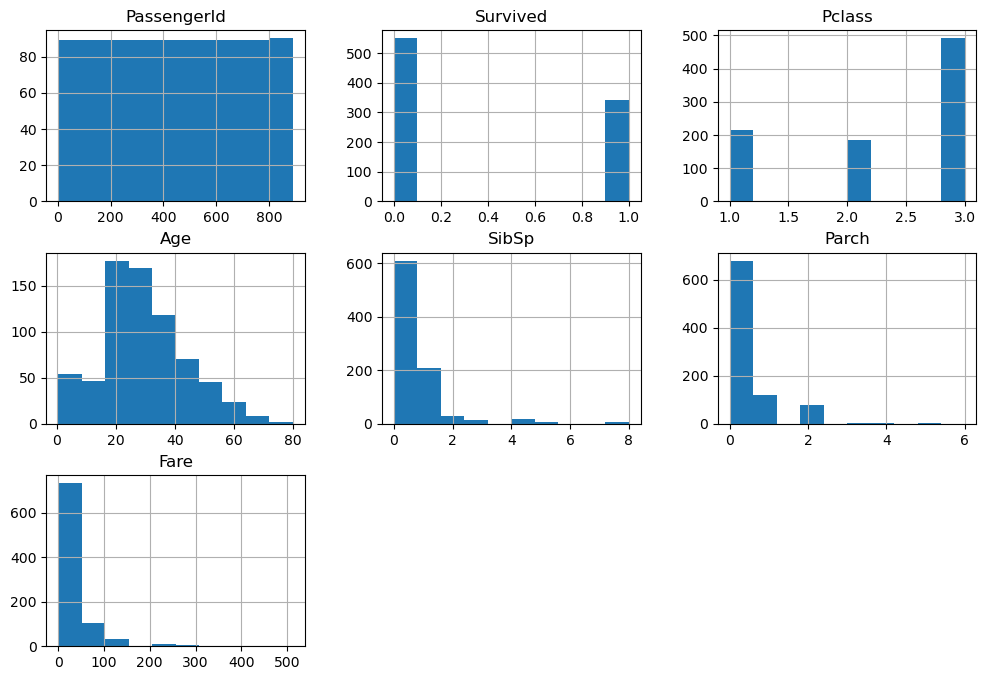

In [6]:
df_train.hist(figsize=(12,8));

DataFrame de treino auxiliar, Colunas com porcentagem de informações faltantes

In [7]:
df_aux_train = pd.DataFrame({'Colunas': df_train.columns,
                            'Tipos': df_train.dtypes,
                            'Percentual_faltantes':df_train.isna().sum() / df_train.shape[0]}
                            )
df_aux_train

,Colunas,Tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Survived,Survived,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.198653
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.000000


Dataframe de teste auxiliar, com porcentagem das informações faltantes

In [8]:
df_aux_test = pd.DataFrame(
    {'colunas' : df_test.columns,
    'tipos' : df_test.dtypes,
    'Percentual_faltantes' : df_test.isna().sum() / df_test.shape[0]}  
)

df_aux_test

,colunas,tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.205742
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.002392
Cabin,Cabin,object,0.782297


Porcentagem de mulheres que sobreviveram

In [9]:
female = df_train[df_train['Sex'] == 'female']['Survived']
rate_fem = sum(female) / len(female)
print('{} % das mulheres sobreviveram'.format(rate_fem*100))

74.20382165605095 % das mulheres sobreviveram


Porcentagem de homens que sobreviveram

In [10]:
male = df_train[df_train['Sex'] == 'male']['Survived']
rate_male = sum(male) / len(male)
print('{} % de homens sobreviveram'.format(rate_male*100))


18.890814558058924 % de homens sobreviveram


Gráfico de sobreviventes por sexo

<Axes: xlabel='Sex', ylabel='Survived'>

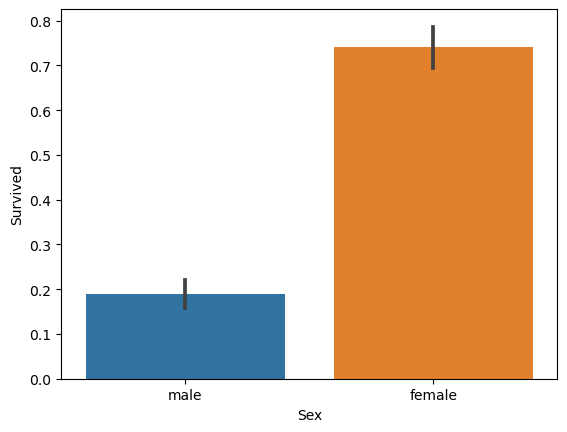

In [11]:
sns.barplot(x='Sex', y='Survived', data=df_train)

<Axes: xlabel='Pclass', ylabel='Survived'>

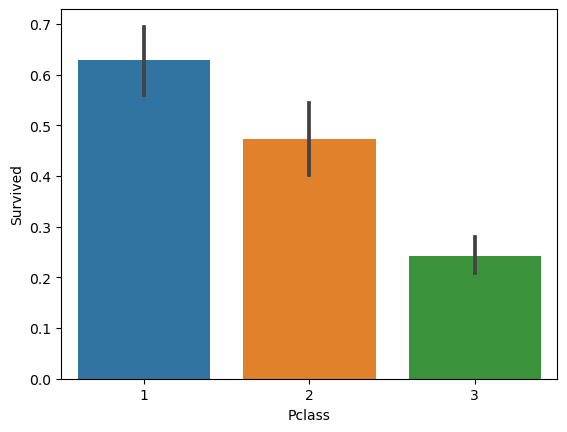

In [12]:
sns.barplot(x='Pclass', y='Survived', data=df_train)

In [13]:
# VERIFICAR O PORQUE DO ERRO
#sns.heatmap(df_train.corr(), square=True, linewidths=.5, annot=True, fmt='.2f');

### Pré-Processamento

Guardando varivaveis para usar posteriormente

In [14]:
passenger_id = df_test['PassengerId']

Descartar variaveis que não serão utilizadas

In [15]:
df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Verificando dados ausentes no Dataset train

In [16]:
df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Verificando dados ausentes no Dataset test

In [17]:
df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Preenchendo/Deletando variaveis ausentes

In [18]:
# Age

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_train['Age'].median(), inplace=True)

# Fare

df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

# Embarked

df_train.dropna(axis=0, inplace=True) #remove todos os valores faltantes, como Age ja foi preenchido, só faltou o Embarked

Guardar a variavel Survived para uso posterior

In [19]:
target = df_train['Survived']
df_train.drop(['Survived'], axis=1, inplace=True)

In [20]:
df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Transformando campos não númericos em númericos, com LabelEncoder do Sklearn

In [21]:
# Treino
df_train['Sex'] = df_train[['Sex']].apply(LabelEncoder().fit_transform)
df_train['Embarked'] = df_train[['Embarked']].apply(LabelEncoder().fit_transform)

# Teste
df_test['Sex'] = df_test[['Sex']].apply(LabelEncoder().fit_transform)
df_test['Embarked'] = df_test[['Embarked']].apply(LabelEncoder().fit_transform)

df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


### Modelo de Regressão Logistica (Logistic Regression)

Instância do Modelo usado (Regressão Logistica)

In [22]:
lr_model = LogisticRegression(solver='liblinear')

Treino do Modelo

In [23]:
lr_model.fit(df_train, target) # dataset de treinamento e variável target que foi salvo anteriormente

LogisticRegression(solver='liblinear')

Acurácia do Modelo

In [24]:
ac_lr = round(lr_model.score(df_train, target)*100, 2)

print(f'Acurácia do Modelo de Regression Logistic: {ac_lr}')


Acurácia do Modelo de Regression Logistic: 80.31


### Modelo da Floresta de Classificação Aleatória (Random Forest Classifier)

Instância do Modelo

In [25]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)

Treino do Modelo

In [26]:
rf_model.fit(df_train, target)

RandomForestClassifier(max_depth=5, random_state=5)

Acurária do Treino

In [27]:
ac_rf = round(rf_model.score(df_train, target) * 100, 2)
print(f'Acurácia do Modelo de RandomForestClassifier: {ac_rf}')

Acurácia do Modelo de RandomForestClassifier: 85.15


### Previsão do Modelo (Random Forest)

Criando modelo de previsão

In [28]:
y_pred_rf = rf_model.predict(df_test)
submission = pd.DataFrame({"PassengerId": passenger_id, "Survived": y_pred_rf});

Gerando arquivo csv

In [29]:
submission.to_csv('submission_rf.csv', index=False)